# Direct Comparison Control T0 v T1
Collab Theis - Hebrok labs

Data analysis: Alexander Fastner

based on Data analysis by: Sara Jimenez

Data generation: Veronica Cochrane

## Loading Packages

In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
import anndata as ad
from anndata import AnnData

## Load Data

In [2]:
# Read raw data and process it
adata = pd.read_csv('../data/S64F_gene_count.txt', index_col=18, sep='\t').T
adata

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,TTR,SST,MT-CO2,MT-ND5,...,RNA5-8SN4,AL354822.1,AC023491.2,RF00003,RF01972,RF01973,RF01974,AC233755.2,AC233755.1,AC213203.1
MAFAS64F_001,611586,314216,328546,267945,135623,122556,169291,198632,113766,95446,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_002,575049,409669,243106,184948,187221,88068,124960,108400,116860,134805,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_003,824730,218574,321668,278746,92467,111493,152005,118341,80843,71644,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_004,858370,262758,351032,358769,109622,134079,175299,232638,115243,58507,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_005,828227,500390,312265,281623,228104,110909,158423,149446,154143,164299,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_006,882622,241947,252381,210988,113488,104409,103355,75316,88540,91730,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_007,698088,281983,336437,280200,118392,117157,164344,222087,105979,86190,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_008,695656,403657,227741,176757,183399,79146,98225,93109,120291,131636,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_009,656783,205008,214125,229070,97473,115874,111309,52115,74326,77237,...,0,0,0,0,0,0,0,0,0,0
MAFAS64F_010,992861,158438,381157,341457,70606,135710,161331,154493,49674,52146,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Transform to AnnData object
adata = AnnData(adata, dtype=np.float32)
adata.var_names_make_unique()
adata

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 18 × 58735

In [4]:
# Read metadata 
metadata = pd.read_csv('../data/2023_MAFA_MetaData_Mut.txt', index_col=0, sep='\t')
metadata

,Sample_Description,Treatment,Genotype,TimePoint,Batch,DOX,GroupName
SampleID,,,,,,,
MAFAS64F_001,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_002,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_003,ControlS64F,Control,S64F,T0,2,N,CTRL_S64F_T0
MAFAS64F_004,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_005,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_006,ControlS64F,Control,S64F,T2,2,Y,CTRL_S64F_T2
MAFAS64F_007,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1
MAFAS64F_008,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1
MAFAS64F_009,ControlS64F,Control,S64F,T1,2,Y,CTRL_S64F_T1


In [5]:
adata.obs['condition'] = metadata['Treatment']
adata.obs['time_point'] = metadata['TimePoint']
adata.obs['DOX'] = metadata['DOX']
adata.obs

,condition,time_point,DOX
MAFAS64F_001,Control,T0,N
MAFAS64F_002,Control,T0,N
MAFAS64F_003,Control,T0,N
MAFAS64F_004,Control,T2,Y
MAFAS64F_005,Control,T2,Y
MAFAS64F_006,Control,T2,Y
MAFAS64F_007,Control,T1,Y
MAFAS64F_008,Control,T1,Y
MAFAS64F_009,Control,T1,Y
MAFAS64F_010,MAFA,T0,N


In [6]:
# split data set by timepoint
subset_t0 = adata[adata.obs.time_point == 'T0']
subset_t1 = adata[adata.obs.time_point == 'T1']
#split by condition to remove control
subset_t0 = subset_t0[subset_t0.obs.condition == "Control"]
subset_t1 = subset_t1[subset_t1.obs.condition == "Control"]
subset_t1.obs['condition'] = subset_t1.obs['condition'].astype(str) + '_T1'
#rename T0 to control
#subset_t0.obs.condition = "Control"
#modify to add _wt/mut to condition to seperate
adata = ad.concat([subset_t0, subset_t1], axis=0)
adata.obs

/tmp/ipykernel_3134/2419942909.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subset_t1.obs['condition'] = subset_t1.obs['condition'].astype(str) + '_T1'


,condition,time_point,DOX
MAFAS64F_001,Control,T0,N
MAFAS64F_002,Control,T0,N
MAFAS64F_003,Control,T0,N
MAFAS64F_007,Control_T1,T1,Y
MAFAS64F_008,Control_T1,T1,Y
MAFAS64F_009,Control_T1,T1,Y


## Quality Control

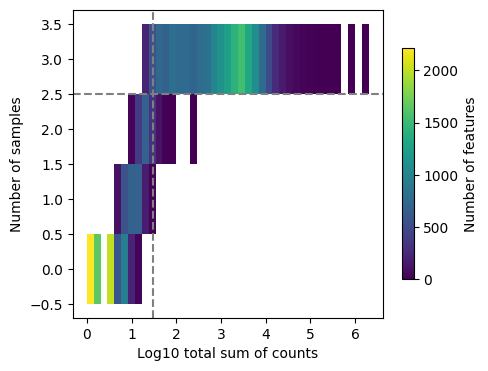

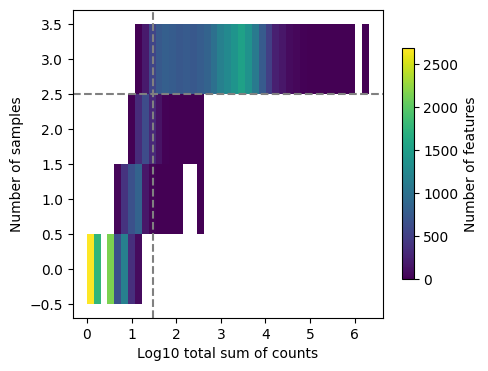

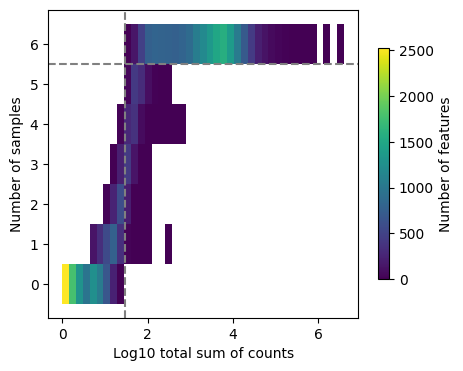

In [7]:
#check various filter points
dc.plot_filter_by_expr(subset_t0, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)
dc.plot_filter_by_expr(subset_t1, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)
dc.plot_filter_by_expr(adata, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)

In [8]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(adata, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)
genes.size

15737

In [9]:
# Filter by these genes
adata = adata[:, genes].copy()
adata

AnnData object with n_obs × n_vars = 6 × 15737
    obs: 'condition', 'time_point', 'DOX'

In [10]:
#!pip install pydeseq2

In [11]:
# Import DESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [12]:
adata.X = np.round(adata.X,0)
#adata.obs.condition

In [13]:
# Build DESeq2 object
dds = DeseqDataSet(
    adata=adata,
    design_factors='condition',
    refit_cooks=True,
    n_cpus=8,
)

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pydeseq2/dds.py:257: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(


In [14]:
# Compute LFCs
dds.deseq2()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 21.07 seconds.

Fitting dispersion trend curve...
... done in 4.07 seconds.

Fitting MAP dispersions...
... done in 22.42 seconds.

Fitting LFCs...
... done in 1.93 seconds.

Refitting 0 outliers.



In [15]:
# Extract contrast 
stat_res = DeseqStats(dds, contrast=['condition', 'Control-T1', 'Control'], n_cpus=8)

In [16]:
# Compute Wald test
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition Control-T1 vs Control


... done in 0.98 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,674239.000000,0.031389,0.114248,0.274742,0.783515,0.999832
MT-CO1,308341.031250,-0.102900,0.425584,-0.241785,0.808947,0.999832
GCG,277314.218750,-0.208179,0.170527,-1.220798,0.222162,0.999832
INS,234828.828125,-0.098449,0.178250,-0.552312,0.580735,0.999832
MT-ND4,137180.531250,-0.078832,0.421262,-0.187132,0.851557,0.999832
...,...,...,...,...,...,...
KLK12,15.107150,0.161053,0.520298,0.309540,0.756911,NaN
IGLV5-45,17.985886,-0.494314,0.392290,-1.260073,0.207643,NaN
ELN,15.370426,-0.035479,0.525347,-0.067534,0.946157,NaN


In [17]:
# Shrink LFCs
stat_res.lfc_shrink(coeff='condition_Control-T1_vs_Control')

Fitting MAP LFCs...
/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pydeseq2/utils.py:1220: RuntimeWarning: overflow encountered in exp
  counts - (counts + size) / (1 + size * np.exp(-xbeta - offset))


Shrunk log2 fold change & Wald test p-value: condition Control-T1 vs Control


... done in 5.31 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,674239.000000,1.489909,0.138961,0.274742,0.783515,0.999832
MT-CO1,308341.031250,2.238780,0.451212,-0.241785,0.808947,0.999832
GCG,277314.218750,-0.444774,0.182179,-1.220798,0.222162,0.999832
INS,234828.828125,-0.501478,0.182739,-0.552312,0.580735,0.999832
MT-ND4,137180.531250,1.810011,0.514546,-0.187132,0.851557,0.999832
...,...,...,...,...,...,...
KLK12,15.107150,0.000600,0.045488,0.309540,0.756911,NaN
IGLV5-45,17.985886,-0.003232,0.043151,-1.260073,0.207643,NaN
ELN,15.370426,-0.000126,0.044476,-0.067534,0.946157,NaN


In [18]:
# Extract results
results_df = stat_res.results_df
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,674239.000000,1.489909,0.138961,0.274742,0.783515,0.999832
MT-CO1,308341.031250,2.238780,0.451212,-0.241785,0.808947,0.999832
GCG,277314.218750,-0.444774,0.182179,-1.220798,0.222162,0.999832
INS,234828.828125,-0.501478,0.182739,-0.552312,0.580735,0.999832
MT-ND4,137180.531250,1.810011,0.514546,-0.187132,0.851557,0.999832
...,...,...,...,...,...,...
KLK12,15.107150,0.000600,0.045488,0.309540,0.756911,NaN
IGLV5-45,17.985886,-0.003232,0.043151,-1.260073,0.207643,NaN
ELN,15.370426,-0.000126,0.044476,-0.067534,0.946157,NaN


In [19]:
#!pip install adjustText

In [20]:
#get the table of the top 20 pvalues from results_df
top_20_pvalues = results_df.sort_values('log2FoldChange', ascending=False).head(20)
top_20_pvalues

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
MT-CO1,308341.031250,2.238780,0.451212,-0.241785,8.089467e-01,9.998321e-01
GPAT3,41.974140,1.869666,0.409693,5.064259,4.099930e-07,3.953870e-04
MT-ND4,137180.531250,1.810011,0.514546,-0.187132,8.515573e-01,9.998321e-01
CHGA,674239.000000,1.489909,0.138961,0.274742,7.835146e-01,9.998321e-01
SST,131433.296875,1.152313,0.846313,-0.386687,6.989881e-01,9.998321e-01
GTF2IP1,1014.709961,0.815753,0.115790,7.389183,1.477340e-13,2.279536e-09
C1RL-AS1,131.733658,0.780241,0.132513,6.276158,3.470405e-10,7.649765e-07
AC012615.1,34.468327,0.739660,0.387903,3.044330,2.331994e-03,2.267237e-01
FUT9,58.959564,0.708383,0.278462,3.433957,5.948388e-04,1.079807e-01


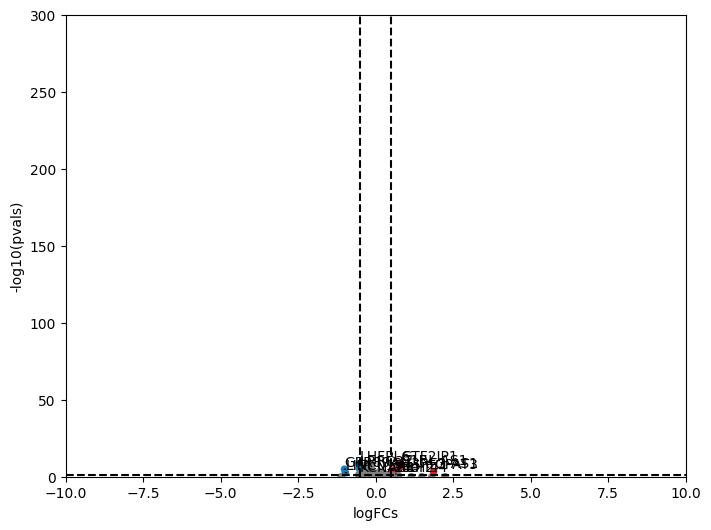

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=20,
    ax=ax
)
ax.set_xlim(-10, 10)
ax.set_ylim(0, 300)
plt.savefig('../figures/direct/Control_MUT_01/volcano.png')

In [22]:
mat = results_df[['stat']].T.rename(index={'stat': 'treatment.vs.control'})
mat

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,TTR,SST,MT-CO2,MT-ND5,...,RPL26P30,JAML,AC112777.1,AC079089.1,TLR10,KLK12,IGLV5-45,ELN,AC079834.2,AC005828.4
treatment.vs.control,0.274742,-0.241785,-1.220798,-0.552312,-0.187132,-0.330863,-1.188047,-0.386687,-0.317099,-0.131663,...,-1.132838,0.990391,-1.149139,0.085274,0.235255,0.30954,-1.260073,-0.067534,0.504836,0.77915


### Transcription factor activity inference

In [23]:
collectri = dc.get_collectri(organism='human')
collectri

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


# Filter new Table by the LFC and adjpvalue from DE table above

In [28]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
#make copy to make table from
table_tf_acts = tf_acts
table_tf_pvals = tf_pvals
table_tf_acts = table_tf_acts.rename(index={"treatment.vs.control": "TF_Activity"})
table_tf_pvals = table_tf_pvals.rename(index={"treatment.vs.control": "TF_pvalue"})
new_table = pd.concat([table_tf_acts, table_tf_pvals], axis = 0).T
#actual df
tf_acts

selected_rows = results_df.loc[[idx for idx in new_table.index if idx in results_df.index]]
selected_rows

# make selectable for various threshold values
Threshold_LFC = 0.1
Threshold_padj = 0.2
subset_lfc = selected_rows[abs(selected_rows["log2FoldChange"]) > Threshold_LFC]
subset_lfc


Running ulm on mat with 1 samples and 15737 targets for 651 sources.


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
ATF2,1726.736938,-0.144270,0.164266,-0.282156,0.777824,0.999832
CTNNB1,7722.462402,-0.114120,0.043257,-3.481795,0.000498,0.097442
ELF1,603.946960,-0.144270,0.164266,-0.302998,0.761892,0.999832
ETS2,1383.104126,-0.144270,0.164266,-2.924493,0.003450,0.272879
FOXP3,16.515741,-0.144270,0.164266,0.482439,0.629494,NaN
FOXQ1,15.046523,-0.144270,0.164266,-1.376958,0.168525,NaN
GRHL3,41.902378,-0.144270,0.164266,1.226918,0.219853,0.999832
HIC1,178.252930,-0.144270,0.164266,-3.054142,0.002257,0.222017
HR,168.304153,0.255090,0.106881,3.300045,0.000967,0.134297


In [29]:
subset_padj = subset_lfc[abs(subset_lfc["padj"]) < Threshold_padj]
subset_padj

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CTNNB1,7722.462402,-0.114120,0.043257,-3.481795,0.000498,0.097442
HR,168.304153,0.255090,0.106881,3.300045,0.000967,0.134297
NEUROD1,9797.915039,-0.113552,0.043597,-3.401870,0.000669,0.111040


In [30]:
#get TF data too
tf_data = new_table.loc[subset_padj.index]
tf_data
#merge into 1 for readability
complete_table = pd.merge(tf_data, subset_padj, left_index=True, right_index=True)
complete_table
#save
complete_table.to_csv('../figures/direct/Control_MUT_01/table_comparison_Control_MUT_01.csv')

### Activity inference with Univariate Linear Model (ULM)

In [ ]:
dc.plot_barplot(
    tf_acts,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=4,
    vmax=4,
    save='../figures/direct/Control_MUT_01/tf_activities.png'
)

In [ ]:
abs_values = tf_acts.abs()
sorted_df = abs_values.sum(axis=0).sort_values(ascending=False)
top_25 = sorted_df.head(25).index
subset_df = tf_acts[top_25]
long_df = subset_df.reset_index().melt(var_name='TFs', value_name='value')
long_df = long_df[long_df.index != 0]
long_df.to_csv('../figures/direct/Control_MUT_01/top25_tfs.csv')
long_df

In [ ]:
# dc.plot_targets(results_df, stat='stat', source_name='PREB', net=collectri, top=15,save='../figures/direct/Control_MUT_01/SIX1_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='GLIS3', net=collectri, top=15,save='../figures/direct/Control_MUT_01/BCL11B_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='MAFA', net=collectri, top=15,save='../figures/direct/Control_MUT_01/MAFA_targets.png')
#

# Plot Networks

In [ ]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=['SIX1', 'BCL11B', 'EN1', 'CREB5', 'ZNF384', 'TFAP2A', 'NR3C1', 'JUN', 'MAFA'],
    n_targets=10,
    node_size=0.5,
    label_size=8,
    figsize=(10, 10),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save = '../figures/direct/Control_MUT_01/plot_networks.png'
)

In [ ]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'treatment.vs.control'})
pvals = results_df[['padj']].T.rename(index={'padj': 'treatment.vs.control'})

# Plot
dc.plot_volcano(logFCs, pvals, 'treatment.vs.control', name='MAFA', net=collectri, top=10, sign_thr=0.05, lFCs_thr=0.5)

### Pathway activity inference

In [ ]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)
progeny

### Activity inference with multivariate Linear Model (MLM)

In [ ]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts

In [ ]:
abs_values = pathway_acts.abs()
sorted_df = abs_values.sum(axis=0).sort_values(ascending=False)
top_25 = sorted_df.head(25).index
subset_df = pathway_acts[top_25]
long_df = subset_df.reset_index().melt(var_name='Pathways', value_name='value')
long_df = long_df[long_df.index != 0]
long_df.to_csv('../figures/direct/Control_MUT_01/top25_pathways.csv')
long_df

In [ ]:
dc.plot_barplot(
    pathway_acts,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=-5,
    vmax=5,
    save='../figures/direct/Control_MUT_01/pathway_activities.png'
)

In [ ]:
# dc.plot_targets(results_df, stat='stat', source_name='p53', net=progeny, top=30,save='../figures/direct/Control_MUT_01/p53_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='Androgen', net=progeny, top=20,save='../figures/direct/Control_MUT_01/Androgen_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='JAK-STAT', net=progeny, top=20, save='../figures/direct/Control_MUT_01/JAK-STAT_targets.png')

# Approach to investigate p53 -> PPI -> mechanism? -> ask -> Table with list of targets for each one of the pathways with statistics 

### Funtional enrichment of Biological Terms

In [ ]:
# The Molecular Signatures Database (MSigDB) is a resource containing a collection of gene sets annotated to different biological processes.
msigdb = dc.get_resource('MSigDB')
msigdb

In [ ]:
msigdb['collection'].unique()

In [ ]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

msigdb